# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Encontrar \beta_0 y \beta_1 resolviendo el sistema
A = np.array([[1, 0],
              [1, 1]])
b = np.array([1, 0])

beta = np.linalg.inv(A).dot(b)
#beta = np.dot(np.linalg.inv(A), b) 
beta

array([ 1., -1.])

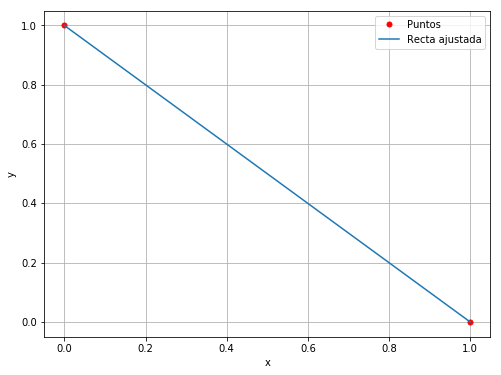

In [3]:
# Graficar la recta encontrada junto con los puntos
x = np.array([0, 1])
y = np.array([1, 0])
plt.figure(figsize=(8,6))
plt.plot(x, y, 'ro', ms=5, label='Puntos')
plt.plot(x, beta[0]+beta[1]*x, label='Recta ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [4]:
# Encontrar \beta_0, \beta_1 y \beta_2
A = np.array([[1, -1, 1],
              [1, 0, 0],
              [1, 1, 1]])
b = np.array([1, 0, 1])

In [5]:
beta = np.linalg.inv(A).dot(b)
beta

array([0., 0., 1.])

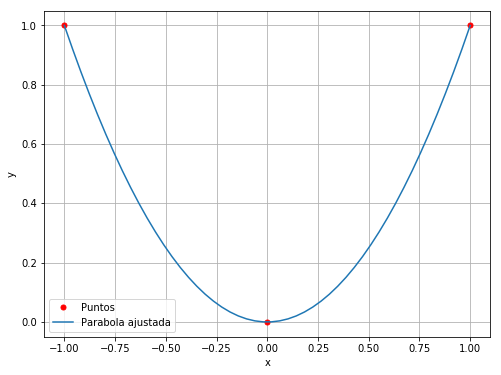

In [6]:
# Graficar la parabola junto con los puntos
x = np.array([-1, 0, 1])
y = np.array([1, 0, 1])
xpuntos = np.linspace(-1,1,50)
plt.figure(figsize=(8,6))
plt.plot(x, y, 'ro', ms=5, label='Puntos')
plt.plot(xpuntos, beta[0]+beta[1]*xpuntos+beta[2]*xpuntos**2, label='Parabola ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [7]:
# Crear un conjunto de puntos ruidosos a partir de una recta
x = np.linspace(0, 1, 50)
y = 2+10*x+np.random.randn(50)

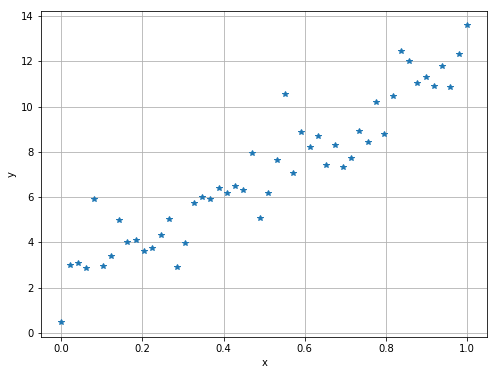

In [8]:
# Graficar
plt.figure(figsize=(8,6))
plt.plot(x, y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [9]:
# Importar el módulo optimize de la librería scipy
import scipy.optimize as opt

In [14]:
# Función minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [10]:
# Definir funcion objetivo y punto inicial
def obj(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x)**2)

beta_inicial = [0, 0]

In [11]:
resultado = opt.minimize(obj, beta_inicial, args=(x,y))

In [12]:
# Mostrar
resultado

      fun: 57.299248775903244
 hess_inv: array([[ 0.03884823, -0.05766083],
       [-0.05766083,  0.11530203]])
      jac: array([-1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([2.16637114, 9.89608286])

¿Qué tan bien luce el ajuste?

In [13]:
# Coeficientes \beta_0 y \beta_1
beta = resultado.x
beta

array([2.16637114, 9.89608286])

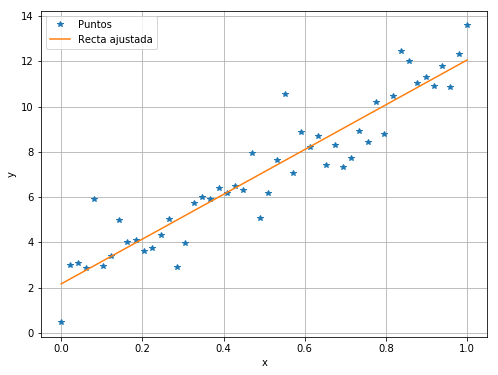

In [14]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(8,6))
plt.plot(x, y, '*', label='Puntos')
plt.plot(x, beta[0]+beta[1]*x, label='Recta ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $10$ y el intercepto es aproximadamente $2$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

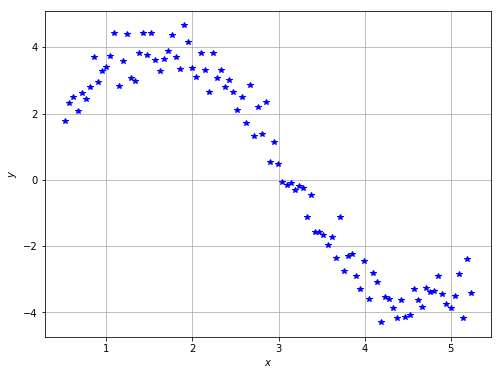

In [15]:
# Generamos 100 puntos ruidosos a partir de una senoidal
n = 100
x = np.linspace(np.pi/6, 5*np.pi/3, n)
y = 4*np.sin(x) + 0.5*np.random.randn(n)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### 2.1. ¿Se ajustará bien una recta?

In [16]:
# Definir funcion objetivo y semilla
def obj(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x)**2)

beta_inicial = [0, 0]

In [17]:
# Resolver
resultado = opt.minimize(obj, beta_inicial, args = (x,y))
resultado

      fun: 152.36447310408073
 hess_inv: array([[ 0.0269637 , -0.00762683],
       [-0.00762683,  0.0026484 ]])
      jac: array([-1.90734863e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 6.1558812 , -2.00748515])

**Veamos $\beta$ para el ajuste con recta**

In [18]:
# Mostrar coeficientes
beta = resultado.x
beta

array([ 6.1558812 , -2.00748515])

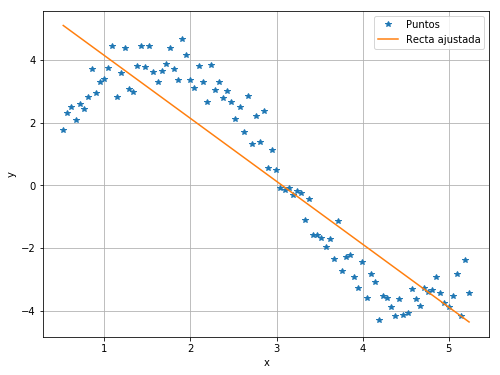

In [19]:
# Graficar
plt.figure(figsize=(8,6))
plt.plot(x, y, '*', label='Puntos')
plt.plot(x, beta[0]+beta[1]*x, label='Recta ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [20]:
# Definir funcion objetivo y semilla
def obj2(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x-beta[2]*x**2)**2)

beta_inicial = [0, 0, 0]

In [21]:
# Resolver
resultado = opt.minimize(obj2, beta_inicial, args=(x,y))
resultado

      fun: 124.7724108821203
 hess_inv: array([[ 0.09892703, -0.07233587,  0.01123501],
       [-0.07233587,  0.0608344 , -0.01010246],
       [ 0.01123501, -0.01010246,  0.00175403]])
      jac: array([ 9.53674316e-07, -2.86102295e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 4.16308393, -0.21557281, -0.31111823])

**Veamos $\beta$ para el ajuste con parábola**

In [22]:
# Mostrar coeficientes
beta2 = resultado.x
beta2

array([ 4.16308393, -0.21557281, -0.31111823])

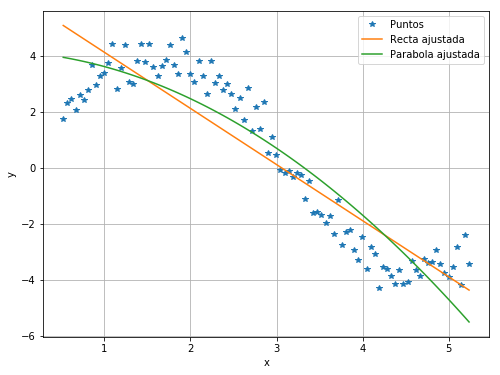

In [23]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(8,6))
plt.plot(x, y, '*', label='Puntos')
plt.plot(x, beta[0]+beta[1]*x, label='Recta ajustada')
plt.plot(x, beta2[0]+beta2[1]*x+beta2[2]*x**2, label='Parabola ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [24]:
# Definir funcion objetivo y semilla
def obj3(beta, x, y):
    return np.sum((y-beta[0]-beta[1]*x-beta[2]*x**2-beta[3]*x**3)**2)

beta_inicial = [0, 0, 0, 0]

In [25]:
# Resolver
resultado = opt.minimize(obj3, beta_inicial, args=(x,y))
resultado

      fun: 23.58983032649717
 hess_inv: array([[ 3.88187388e-03, -3.51695155e-04, -4.78568978e-05,
        -1.39630657e-05],
       [-3.51695155e-04,  5.45226508e-04, -2.77141538e-04,
         3.50378529e-05],
       [-4.78568978e-05, -2.77141538e-04,  1.54991524e-04,
        -1.80453530e-05],
       [-1.39630657e-05,  3.50378529e-05, -1.80453530e-05,
         3.64592321e-06]])
      jac: array([-3.09944153e-06, -2.19345093e-05, -5.10215759e-05,  1.38282776e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 973
      nit: 10
     njev: 159
   status: 2
  success: False
        x: array([-2.79937119, 10.39369651, -4.57787077,  0.49387256])

**Veamos $\beta$ para el ajuste con cúbica**

In [26]:
# Mostrar coeficientes
beta3 = resultado.x
beta3

array([-2.79937119, 10.39369651, -4.57787077,  0.49387256])

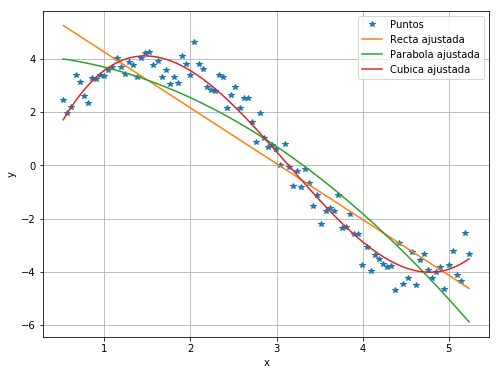

In [51]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(8,6))
plt.plot(x, y, '*', label='Puntos')
plt.plot(x, beta[0]+beta[1]*x, label='Recta ajustada')
plt.plot(x, beta2[0]+beta2[1]*x+beta2[2]*x**2, label='Parabola ajustada')
plt.plot(x, beta3[0]+beta3[1]*x+beta3[2]*x**2+beta3[3]*x**3, label='Cubica ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [27]:
# Definimos funcion objetivo y semilla
def obj7(beta, x, y):
    return np.sum((y-beta.dot([x**i for i in range(8)]))**2)

beta_inicial = np.zeros(8)

In [28]:
# Resolvemos
resultado = opt.minimize(obj7, beta_inicial, args=(x,y))
resultado

      fun: 20.374093114978315
 hess_inv: array([[ 4.76260089e-01, -3.83836399e-01, -1.96257649e-01,
         4.29754635e-02,  1.74409070e-01, -1.00410738e-01,
         2.00400912e-02, -1.37381490e-03],
       [-3.83836399e-01,  6.74769778e-01, -2.37316444e-01,
        -8.87111288e-02,  6.39477392e-02, -9.96026238e-03,
        -1.02573912e-04,  8.68126596e-05],
       [-1.96257649e-01, -2.37316444e-01,  7.27478733e-01,
        -2.60752397e-01, -1.34479829e-01,  9.96370778e-02,
        -2.07405448e-02,  1.44001117e-03],
       [ 4.29754635e-02, -8.87111288e-02, -2.60752397e-01,
         5.68594569e-01, -3.95369929e-01,  1.26837866e-01,
        -1.92819043e-02,  1.12439969e-03],
       [ 1.74409070e-01,  6.39477392e-02, -1.34479829e-01,
        -3.95369929e-01,  4.83236517e-01, -1.96514469e-01,
         3.42571145e-02, -2.18672969e-03],
       [-1.00410738e-01, -9.96026238e-03,  9.96370778e-02,
         1.26837866e-01, -1.96514469e-01,  8.50494884e-02,
        -1.52875365e-02,  9.94395612

**De nuevo, veamos $\beta$**

In [29]:
# Mostrar coeficientes
beta7 = resultado.x
beta7

array([ 0.76894963,  2.22675891,  0.9954625 , -0.94325432,  0.25464461,
       -0.11140022,  0.02995795, -0.00257695])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

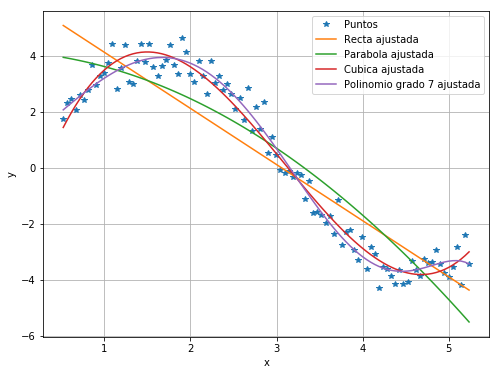

In [31]:
# Grafica de ajustes
plt.figure(figsize=(8,6))
plt.plot(x, y, '*', label='Puntos')
plt.plot(x, beta[0]+beta[1]*x, label='Recta ajustada')
plt.plot(x, beta2[0]+beta2[1]*x+beta2[2]*x**2, label='Parabola ajustada')
plt.plot(x, beta3[0]+beta3[1]*x+beta3[2]*x**2+beta3[3]*x**3, label='Cubica ajustada')
plt.plot(x, beta7.dot([x**i for i in range(8)]), label='Polinomio grado 7 ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

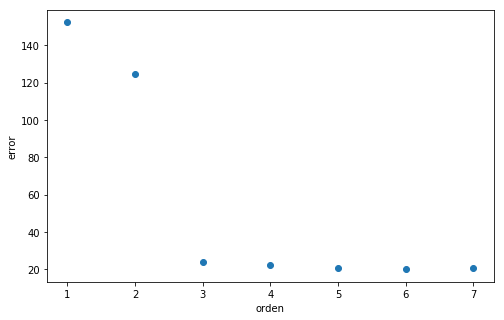

In [32]:
# Error cuadratico
e_ms = []
def obj(b, x, y, n):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)

for i in range(7):
    b0 = np.zeros((i+2,))
    res = opt.minimize(obj, b0, args=(x,y,i+1))
    e_ms.append(res.fun)
    
plt.figure(figsize=(8,5))
plt.plot(np.arange(7)+1, e_ms, 'o')
plt.xlabel('orden')
plt.ylabel('error')
plt.show()

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

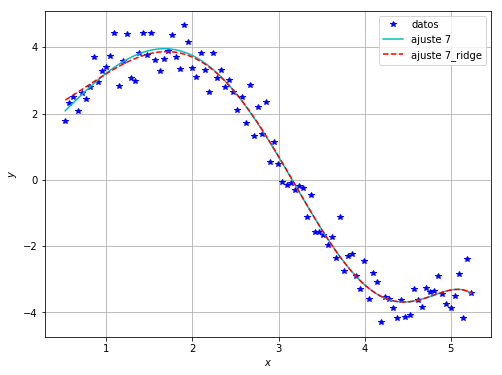

In [34]:
def obj_ridge(b, x, y, n, l):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)+l*np.linalg.norm(b)**2

b0 = np.random.random((8,))
res = opt.minimize(obj_ridge, b0, args=(x,y,7,0.1))
yhat7_ridge = np.array([x**j for j in range(8)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, beta7.dot([x**i for i in range(8)]), '-c', label = 'ajuste 7')
plt.plot(x, yhat7_ridge, '--r', label = 'ajuste 7_ridge')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [35]:
res.x

array([ 1.72650287e+00,  1.00239130e+00,  5.22105313e-01,  3.39300964e-01,
       -4.67492812e-01,  7.55424312e-02,  6.50115498e-03, -1.42073989e-03])

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

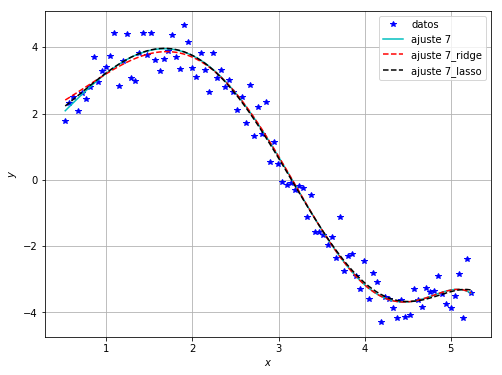

In [36]:
def obj_lasso(b, x, y, n, l):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)+l*np.linalg.norm(b,1)

b0 = np.random.random((8,))
res = opt.minimize(obj_lasso, b0, args=(x,y,7,0.1))
yhat7_lasso = np.array([x**j for j in range(8)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, beta7.dot([x**i for i in range(8)]), '-c', label = 'ajuste 7')
plt.plot(x, yhat7_ridge, '--r', label = 'ajuste 7_ridge')
plt.plot(x, yhat7_lasso, '--k', label = 'ajuste 7_lasso')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [85]:
res.x

array([ 8.47870249e-01,  1.90282708e+00,  1.10992837e+00, -7.87228430e-01,
        6.74233962e-02, -3.04099553e-02,  1.47733294e-02, -1.55676049e-03])

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

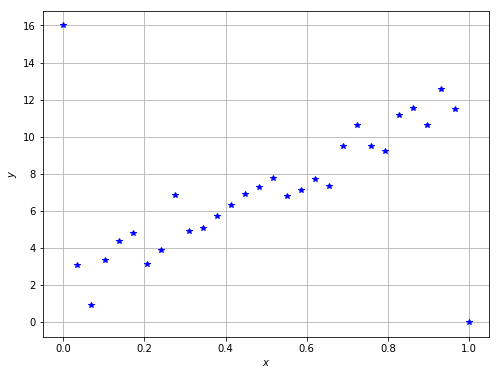

In [37]:
x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)

y[0] = 16
y[-1] = 0


plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

Solucionamos el problema normalmente...

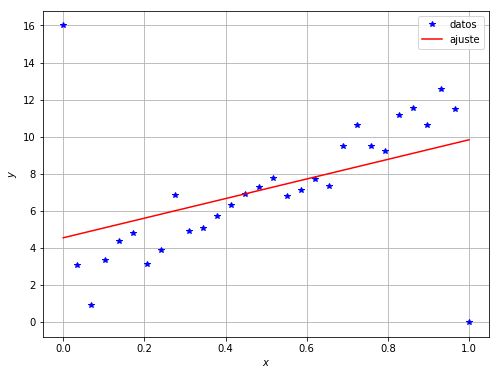

In [38]:
b0 = np.random.random((2,))
res = opt.minimize(obj, b0, args=(x,y,1))
yhat = np.array([x**j for j in range(2)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [48]:
res.x

array([ 4.24831492,  5.32766541])

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es *ajuste robusto*.

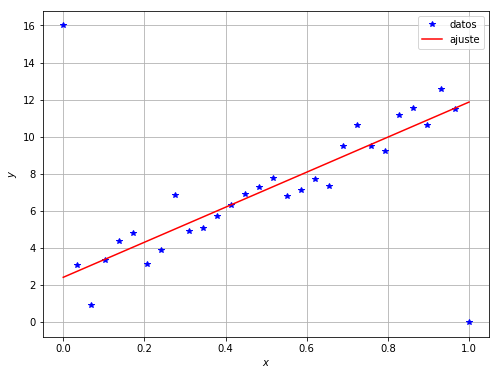

In [39]:
def huber(a, d):
    if np.abs(a)<=d:
        return a**2
    else:
        return d*(2*np.abs(a)-d)

def obj_robust(b, x, y, n, d):
    return np.sum(np.vectorize(huber)(y-b.dot([x**i for i in range(n+1)]), 1.345))

b0 = np.random.random((2,))
res = opt.minimize(obj_robust, b0, args=(x,y,1,1.345))
yhat = np.array([x**j for j in range(2)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [40]:
res.x

array([2.41058208, 9.4565214 ])

Mejor...

## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 7 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado de polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.01.
4. Comparar los beta.

Abrir un nuevo notebook, llamado `Tarea5_ApellidoNombre` y subirlo a moodle en el espacio habilitado. Tarea para el Lunes 17 a las 23:00.

In [30]:
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

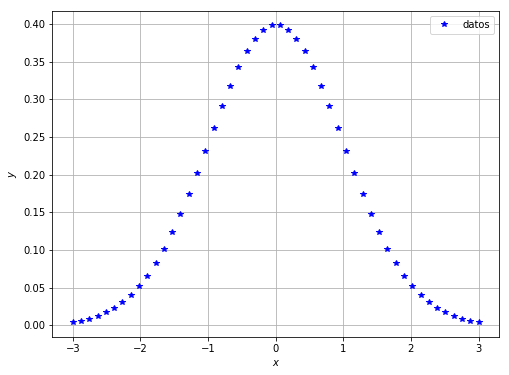

In [31]:
x = np.linspace(-3, 3)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

# Avisos:

## Recordar tarea para hoy y tarea para el jueves.

## Evaluación primer módulo: (Por definir)
### Se las entrego el Lunes 17 de Septiembre (dentro de una semana) por moodle y tienen hasta el Viernes 21 de Septiembre.

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Entregarme una hoja por equipo con los nombres de los integrantes ya.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para la siguiente semana, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alncance.
### 4. Fecha de entrega y presentación: Lunes 24 de septiembre.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>